In [4]:
import os
print(os.getcwd())
print(os.listdir())




C:\Users\HP\Internship practice
['.ipynb_checkpoints', '12dec.ipynb', '9dec.ipynb', 'Breast Cancer Dataset.ipynb', 'breastcancer datatest.ipynb', 'day 1.ipynb', 'day2,3.ipynb', 'hospital_final_data.csv', 'Hospital_Patient_Analysis.ipynb', 'import1.ipynb', 'Loan_LogReg.ipynb', 'Loan_ML', 'machine learning 1.ipynb', 'MY FIRST APP.ipynb', 'my hospital project.ipynb', 'new dmart.csv', 'project R&PYTHON.ipynb']


In [5]:
import os
os.chdir(r"C:\Users\HP\Internship practice\Loan_ML")

print(os.getcwd())
print(os.listdir())



C:\Users\HP\Internship practice\Loan_ML
['.ipynb_checkpoints', 'clean_train.csv', 'clean_train.xlsx', 'roc_curve.png', 'submission.csv', 'submission.xlsx', 'test_Y3wMUE5_7gLdaTN.csv', 'train_u6lujuX_CVtuZ9i.csv', 'Untitled.ipynb']


In [6]:
import pandas as pd

train = pd.read_csv("train_u6lujux_CVtuZ9i.csv")
test  = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

print("Train:", train.shape)
print("Test:", test.shape)

train.head()


Train: (614, 13)
Test: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [8]:
train['Loan_Status'].value_counts(normalize=True)


Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

In [9]:
train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# categorical
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])

# numerical
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())



In [11]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
train['Loan_Status'] = train['Loan_Status'].map({'Y':1, 'N':0})


In [13]:
train = pd.get_dummies(train, drop_first=True)


In [14]:
train.drop(columns=['Loan_ID'], inplace=True, errors='ignore')


In [15]:
train.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Loan_ID_LP001003',
       'Loan_ID_LP001005', 'Loan_ID_LP001006', 'Loan_ID_LP001008',
       ...
       'Loan_ID_LP002990', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object', length=628)

In [16]:
'Loan_ID' in train.columns


False

In [17]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']


### Train–Test Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape, "X_val:", X_val.shape)
print("y_train:", y_train.shape, "y_val:", y_val.shape)


X_train: (491, 627) X_val: (123, 627)
y_train: (491,) y_val: (123,)


### Logistic Regression Model Train


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),   # sparse/dummies ke liye
    ("lr", LogisticRegression(max_iter=5000, solver="lbfgs"))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('lr', LogisticRegression(max_iter=5000))])

### Prediction + Accuracy

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = pipe.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.8455284552845529
[[20 18]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.95      0.53      0.68        38
           1       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = pipe.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Accuracy: 0.8455284552845529
Confusion Matrix:
 [[20 18]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.53      0.68        38
           1       0.82      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



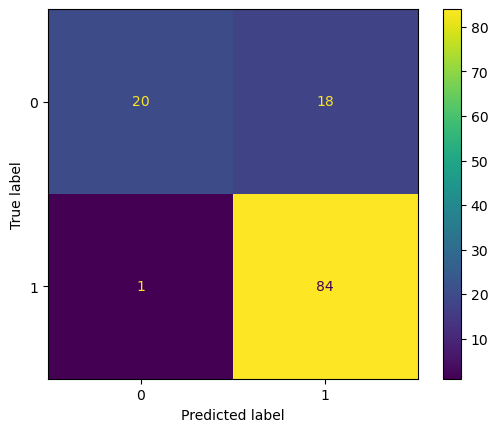

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(pipe, X_val, y_val)
plt.show()


In [23]:
from sklearn.metrics import roc_auc_score

y_prob = pipe.predict_proba(X_val)[:,1]
print("ROC-AUC:", roc_auc_score(y_val, y_prob))


ROC-AUC: 0.8479876160990713


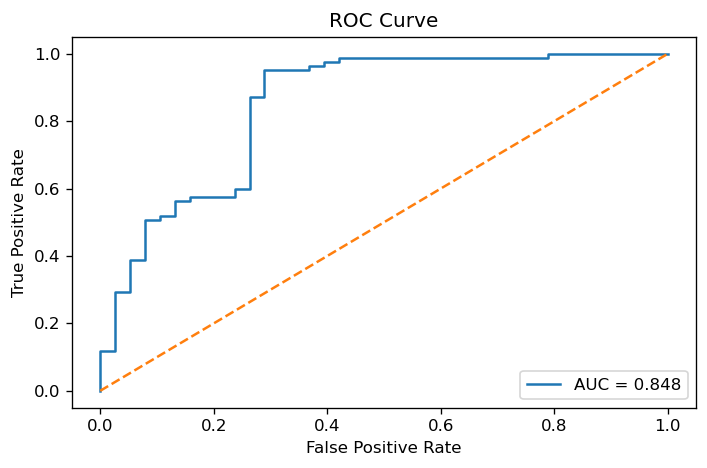

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4), dpi=120)   # size control
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()  # automatically fit
plt.show()




### Test load + missing fill

In [26]:
import pandas as pd

# 1) Reload original train (fresh)
train_raw = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

# 2) Fill categorical missing using TRAIN MODE (safe check with if)
cat_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History']
for col in cat_cols:
    if col in train_raw.columns and col in test.columns:
        test[col] = test[col].fillna(train_raw[col].mode()[0])
        train_raw[col] = train_raw[col].fillna(train_raw[col].mode()[0])

# 3) Fill numerical missing using TRAIN MEDIAN
num_cols = ['LoanAmount','Loan_Amount_Term']
for col in num_cols:
    if col in train_raw.columns and col in test.columns:
        test[col] = test[col].fillna(train_raw[col].median())
        train_raw[col] = train_raw[col].fillna(train_raw[col].median())

print("Missing in test after fill:\n", test.isnull().sum())



Missing in test after fill:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


## Encode + Align + Predict

In [27]:
import pandas as pd

# 1) Reload original train again (safe)
train_raw = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

# 2) Target
y = train_raw["Loan_Status"].map({"Y":1, "N":0})

# 3) Features (drop target + Loan_ID)
X = train_raw.drop(columns=["Loan_Status"], errors="ignore")
X = X.drop(columns=["Loan_ID"], errors="ignore")
test2 = test.drop(columns=["Loan_ID"], errors="ignore")   # test already filled

# 4) One-hot encode
X = pd.get_dummies(X, drop_first=True)
test2 = pd.get_dummies(test2, drop_first=True)

# 5) Align columns (VERY IMPORTANT)
X, test2 = X.align(test2, join="left", axis=1, fill_value=0)

print("Train:", X.shape, "Test:", test2.shape)


Train: (614, 14) Test: (367, 14)


## Final prediction

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1) Load
train = pd.read_csv("train_u6lujux_CVtuZ9i.csv")
test  = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

# Save IDs for submission
test_ids = test["Loan_ID"].copy()

# 2) Missing value handling (train stats use karo)
cat_cols = ['Gender','Married','Dependents','Self_Employed','Credit_History']
num_cols = ['LoanAmount','Loan_Amount_Term']

for col in cat_cols:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col]  = test[col].fillna(train[col].mode()[0])

for col in num_cols:
    train[col] = train[col].fillna(train[col].median())
    test[col]  = test[col].fillna(train[col].median())

# 3) Target encode
train["Loan_Status"] = train["Loan_Status"].map({'Y':1,'N':0})

# 4) DROP Loan_ID before dummies
train = train.drop(columns=["Loan_ID"])
test  = test.drop(columns=["Loan_ID"])

# 5) One-hot encode (same for both)
train = pd.get_dummies(train, drop_first=True)
test  = pd.get_dummies(test, drop_first=True)

# 6) Split X,y
X = train.drop(columns=["Loan_Status"])
y = train["Loan_Status"]  # <-- Series (important)

# Align columns (VERY IMPORTANT)
X, test = X.align(test, join="left", axis=1, fill_value=0)

print("Train X:", X.shape, "Test:", test.shape, "y:", y.shape)

# 7) Model pipeline
pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("lr", LogisticRegression(max_iter=5000, solver="lbfgs"))
])

pipe.fit(X, y)

# 8) Predict on test
test_pred = pipe.predict(test)  # 0/1
test_pred_label = pd.Series(test_pred).map({1:"Y", 0:"N"})

# 9) Submission file
submission = pd.DataFrame({
    "Loan_ID": test_ids,
    "Loan_Status": test_pred_label
})

submission.to_csv("submission.csv", index=False)
print("Saved: submission.csv")



Train X: (614, 14) Test: (367, 14) y: (614,)
Saved: submission.csv


In [31]:
import os
os.listdir()


['.ipynb_checkpoints',
 'roc_curve.png',
 'submission.csv',
 'test_Y3wMUE5_7gLdaTN.csv',
 'train_u6lujuX_CVtuZ9i.csv',
 'Untitled.ipynb']

In [32]:
sub = pd.read_csv("submission.csv")
sub.head()
sub["Loan_Status"].value_counts()


Loan_Status
Y    306
N     61
Name: count, dtype: int64

In [34]:
train.to_csv("clean_train.csv", index=False)
submission.to_csv("submission.csv", index=False)

print("✅ Saved: clean_train.csv, submission.csv")



✅ Saved: clean_train.csv, submission.csv


In [35]:
import pandas as pd
sub = pd.read_csv("submission.csv")
sub.head()


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [36]:
sub["Loan_Status"].value_counts()


Loan_Status
Y    306
N     61
Name: count, dtype: int64

In [37]:
submission.to_excel("submission.xlsx", index=False)
train.to_excel("clean_train.xlsx", index=False)
print("Saved: submission.xlsx, clean_train.xlsx")


Saved: submission.xlsx, clean_train.xlsx
